In [ ]:
%matplotlib inline
from google.colab import drive, files

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
import cv2, os

import torch, torchvision
import torchvision.transforms as transforms
from torchvision import datasets as dset
from torch.utils.data import DataLoader

In [ ]:
# Mount your Google Drive to Google Colab

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change to the drive root directory

%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [ ]:
# Extract files from dataset

!unzip data.zip -d dataset

Archive:  data.zip
  inflating: dataset/0.jpg           
  inflating: dataset/1.jpg           
  inflating: dataset/10.jpg          
  inflating: dataset/100.jpg         
  inflating: dataset/101.jpg         
  inflating: dataset/102.jpg         
  inflating: dataset/103.jpg         
  inflating: dataset/104.jpg         
  inflating: dataset/105.jpg         
  inflating: dataset/106.jpg         
  inflating: dataset/107.jpg         
  inflating: dataset/108.jpg         
  inflating: dataset/109.jpg         
  inflating: dataset/11.jpg          
  inflating: dataset/110.jpg         
  inflating: dataset/111.jpg         
  inflating: dataset/112.jpg         
  inflating: dataset/113.jpg         
  inflating: dataset/114.jpg         
  inflating: dataset/115.jpg         
  inflating: dataset/116.jpg         
  inflating: dataset/117.jpg         
  inflating: dataset/118.jpg         
  inflating: dataset/119.jpg         
  inflating: dataset/12.jpg          
  inflating: dataset/120.jpg   

In [ ]:
# Assign filepath to a variable

data_path = "/content/drive/My Drive/dataset/"

In [ ]:
# Get a list of filenames

def get_filenames(path):
  return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

file_names = get_filenames(data_path)
file_names[:5]

['/content/drive/My Drive/dataset/0.jpg',
 '/content/drive/My Drive/dataset/1.jpg',
 '/content/drive/My Drive/dataset/10.jpg',
 '/content/drive/My Drive/dataset/100.jpg',
 '/content/drive/My Drive/dataset/101.jpg']

In [ ]:
# Histogram Equalization with OpenCV [2]

def equalize_hist(img):
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return cv2.equalizeHist(gray_img)

In [ ]:
# Apply Histogram Equalization [1]

for infile in file_names:
    # Read image
    img = cv2.imread(infile)
  
    # Check if it's a three channel image
    if (len(img.shape)== 3):
      outfile = equalize_hist(img)
      cv2.imwrite(infile, outfile)
    else:
      print('No RGB image')

In [ ]:
# Data Loader and transformations [3]

def loader(data_dir, img_size, batchSize):

  # Preprocessing: Resize, brightness corrections
  dataset = dset.ImageFolder(root = data_dir,
                            transform=transforms.Compose([
                            transforms.Resize(img_size),
                            transforms.ColorJitter(brightness=(0.5, 1.5)),
                            transforms.ToTensor(),
                            ]))
  
  # Loader
  dataloader = torch.utils.data.DataLoader(dataset,
                                          batch_size= batchSize,
                                          shuffle=True)
  
  print('Data size:', len(dataset), 'images')
  
  return dataloader

In [ ]:
# Iterable over dataset with parameters: image size (resize) and batch size (sample)

data_path = '.'
sample_loader = loader(data_path, 64, 8)
print('Sample size:', len(sample_loader), 'images')

Data size: 436 images
Sample size: 55 images


In [ ]:
# Iterator over sample

sample_iter = iter(sample_loader)
sample, labels  = sample_iter.next()

print('Tensor size in sample = {}'.format(sample.size()))

Tensor size in sample = torch.Size([8, 3, 88, 64])


In [ ]:
# RGB visualization of a single image

for i in range(0, 1):
  img = sample[i]
  im = img.permute(1,2,0)[:,:,0] #blue=0, green=1, red=2
  plt.imshow(im)
  plt.show()

Not showing outputs for ethical reasons.


In [ ]:
# Display a grid of images from sample

grid_sample = torchvision.utils.make_grid(sample)
plt.figure(figsize = (20,10))
plt.imshow(grid_sample.numpy().transpose((1, 2, 0)))
plt.axis('on')

In [ ]:
# Check out directory

%cd /content/drive/My Drive/dataset/

/content/drive/My Drive/dataset


In [ ]:
# Compress folder of processed images

!zip -r /content/drive/My\ Drive/dataset/results.zip /content/drive/My\ Drive/dataset

  adding: content/drive/My Drive/dataset/ (stored 0%)
  adding: content/drive/My Drive/dataset/0.jpg (deflated 1%)
  adding: content/drive/My Drive/dataset/1.jpg (deflated 1%)
  adding: content/drive/My Drive/dataset/10.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/100.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/101.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/102.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/103.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/104.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/105.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/106.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/107.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/108.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/109.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/11.jpg (deflated 0%)
  adding: content/drive/My Drive/dataset/110.jpg (deflated 0%)
  addin

In [ ]:
# Download results to your computer

files.download("/content/drive/My Drive/dataset/results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

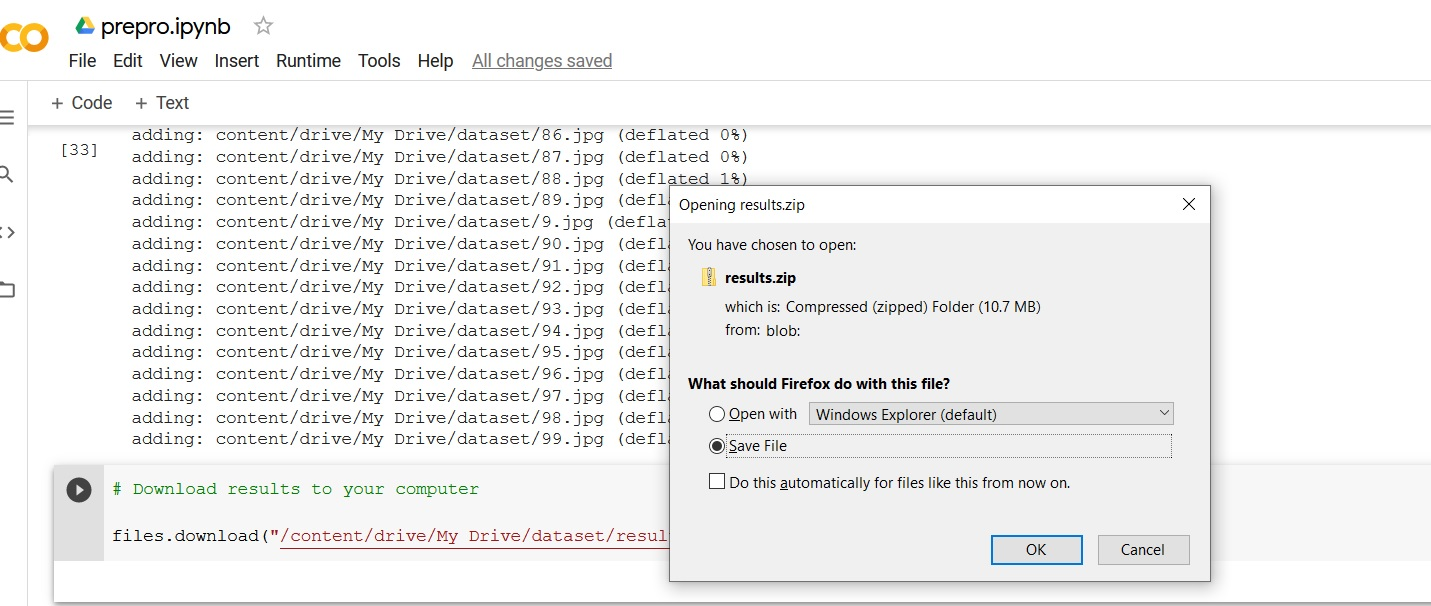


**References**

[1] [Basic Image Handling and Processing](https://www.oreilly.com/library/view/programming-computer-vision/9781449341916/ch01.html)

[2] [OpenCV Python equalizeHist colored image](https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image)

[3] [PyTorch Dataset and DataLoader](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader)